<a href="https://colab.research.google.com/github/PalmerTurley34/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_122_Assignment_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


## Confidence Intervals

In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-01 17:09:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-01 17:09:56 (618 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [4]:
# read data set and clean data
column_headers = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
                  'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                  'el-salvador-aid', 'religious-groups-in-schools', 
                  'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                  'mx-missile', 'immigration', 'synfuels-corporation-cutback', 
                  'education-spending', 'superfund-right-to-sue', 'crime', 
                  'duty-free-exports', 'export-administration-act-south-africa']


voting_df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')
print(voting_df.shape)
voting_df.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
# change y to 1 and n to 0
voting_df = voting_df.replace({'y': 1, 'n': 0})

In [12]:
voting_df['water-project-cost-sharing'].value_counts(dropna=False)

1.0    195
0.0    192
NaN     48
Name: water-project-cost-sharing, dtype: int64

In [14]:
# water project column with no nans
col = voting_df['water-project-cost-sharing']
wp_no_nans = col[~np.isnan(col)]
wp_no_nans

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
429    0.0
430    0.0
431    0.0
433    0.0
434    1.0
Name: water-project-cost-sharing, Length: 387, dtype: float64

In [18]:
# confidence interval of water project bill voting
std_err = (np.std(wp_no_nans.values, ddof=1))/(len(wp_no_nans))**.5
CI = stats.t.interval(0.95, (len(wp_no_nans))-1, loc=np.mean(wp_no_nans.values),
                        scale=std_err)

CI

(0.45384081311663604, 0.5539111248678601)

In [17]:
# mean of water project bill voting
wp_no_nans.mean()

0.5038759689922481

In [21]:
# I am 95% confident that the voting on this bill in the population as a whole would be 50.3% +/- about 5%
print(CI[1]-wp_no_nans.mean())
wp_no_nans.mean() - CI[0]

0.050035155875612025


0.050035155875612025

## Graphical Representation of the Confidence Interval

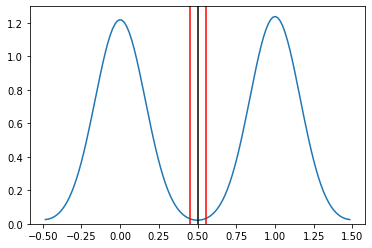

In [25]:
import seaborn as sns
sns.kdeplot(wp_no_nans.values)
plt.axvline(x=CI[0], color='r')
plt.axvline(x=CI[1], color='r')
plt.axvline(x=wp_no_nans.values.mean(), color='k');

The voting on this bill was about 50/50 with a marigin of error about 5%. If we took more samples, 95% of the time the mean of the samples would fall between about 45%-55%. In other words, we can be 95% confident that the true mean of the population is somewhere between 45% and 55%.

## Chi-Squared Test by Hand

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
# look at crosstab to cut education into bins
pd.crosstab(df['education-num'], df['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
education-num,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0
2,0,0,0,168,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,333,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,646,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,514,0,0,0,0,0,0,0,0,0
6,933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1175,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,433,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,10501,0,0,0,0


In [34]:
cut_points = [0, 9, 12, 13, 17]
labels = ['HS Grad or below', 'Associates or some college', 'Bachelors', 'Masters and above']
df['education_categories']=pd.cut(df['education-num'], cut_points, labels=labels)
df['education_categories'].value_counts()

HS Grad or below              14754
Associates or some college     9740
Bachelors                      5355
Masters and above              2712
Name: education_categories, dtype: int64

In [37]:
# I'll make a chi-squared test on this crosstab
data = pd.crosstab(df['salary'], df['education_categories'])
data

education_categories,HS Grad or below,Associates or some college,Bachelors,Masters and above
salary,,,,
<=50K,12835,7727,3134,1024
>50K,1919,2013,2221,1688


 Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [43]:
data_margins = pd.crosstab(df['salary'], df['education_categories'], margins=True)

education_categories,HS Grad or below,Associates or some college,Bachelors,Masters and above,All
salary,,,,,
<=50K,12835,7727,3134,1024,24720
>50K,1919,2013,2221,1688,7841
All,14754,9740,5355,2712,32561


In [49]:
col_sums = data_margins.iloc[2, 0:4].values
col_sums

array([14754,  9740,  5355,  2712])

In [52]:
row_sums = data_margins.iloc[:2, 4].values
row_sums

array([24720,  7841])

In [53]:
total = data_margins.iloc[2,4]
total

32561

In [54]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
expected

array([[11201.09578944,  7394.51491048,  4065.46481988,  2058.92448021],
       [ 3552.90421056,  2345.48508952,  1289.53518012,   653.07551979]])

In [55]:
observed = data.values
observed

array([[12835,  7727,  3134,  1024],
       [ 1919,  2013,  2221,  1688]])

In [57]:
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared

4098.297424900505

## Chi-Squared test using SciPy

In [60]:
stats.chi2_contingency(data)

(4098.297424900505,
 0.0,
 3,
 array([[11201.09578944,  7394.51491048,  4065.46481988,  2058.92448021],
        [ 3552.90421056,  2345.48508952,  1289.53518012,   653.07551979]]))

Null Hypothesis: Education and Salary are independent of each other
Alternative: Education and Salary are dependent

A p-value of 0.0 means we reject the null hypothesis and conclude there is in fact a correlation between education and salary.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)